Please **submit this Jupyter notebook through Canvas** no later than **December 2, 8:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
In the box below, write down the names + student ID of the people in your group.

Name1: Julien Fer <br>
Name2: Wiebe Jelsma<br>
Student_number1: 10649441<br>
Student_number2: 12468223 <br>


-----
# Exercise 1
Consider the function

$$
  f(x) = 600 x^4 - 550 x^3 + 200 x^2 - 20 x -1.
$$

This function contains a zero in the interval $[0.1, 1.0]$. In this exercise you may use library routines, or routines that you have implemented yourself.

## (a)
Use the secant method to locate this zero. Make a graph that shows the convergence of $x$ as a function of the number of iterations.

The value of x is  0.2323529647499185


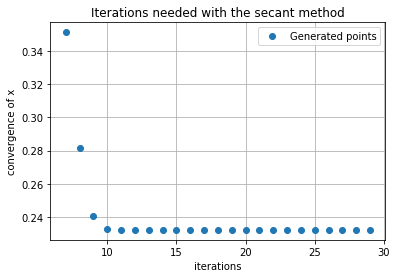

In [11]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return (600*x**4 - 550*x**3 + 200*x**2 - 20*x - 1)

x0 = np.array([0.1,1.0])
a = np.arange(-50, 50)
xlist = []
ylist = []
listi = []
for i in range(7,30):
    root = optimize.newton(f, x0, maxiter = i)
    xlist.append(root[0])
    ylist.append(root[1])
    listi.append(i)
    

print("The value of x is ", ylist[-1])
# plt.plot(secondedxaxis,secondOnePoly(secondedxaxis), label = "Fitted data")
plt.plot(listi,ylist, 'o',label = "Generated points")
plt.title("Iterations needed with the secant method")
plt.xlabel("iterations")
plt.ylabel("convergence of x")
plt.grid()
plt.legend()

## (b)
Use the Newton's method to locate this zero. Make a graph that shows the convergence of $x$ as a function of the number of iterations.

The value of x is  0.23235296474991718


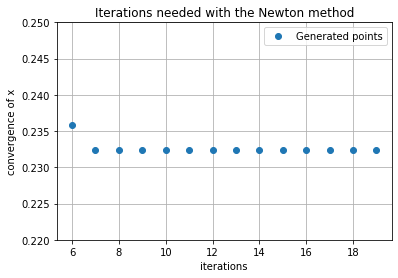

In [15]:
from scipy import optimize
import numpy as np
def derivative(x):
    return (2400*x**3 - 1650*x**2 + 400*x - 20)

xlist2 = []
ylist2 = []
listi2 = []
for i in range(6,20):
    root = optimize.newton(f, x0, maxiter = i, fprime=lambda x: 2400*x**3 - 1650*x**2 + 400*x - 20)
    xlist2.append(root[0])
    ylist2.append(root[1])
    listi2.append(i)
    

print("The value of x is ", ylist2[-1])
# plt.plot(secondedxaxis,secondOnePoly(secondedxaxis), label = "Fitted data")
plt.plot(listi2,ylist2, 'o',label = "Generated points")
plt.title("Iterations needed with the Newton method")
plt.xlabel("iterations")
plt.ylabel("convergence of x")
plt.grid()
plt.axis([None, None, 0.22, 0.25])
plt.legend()


## (c)
Briefly compare the convergence behavior of the Newton and secant methods. Is there a large difference?

In [3]:
# python code here

No. We see that both methods do not work when the iterations are too low, that is why we start counting them from 6 or 7 iterations. We see that they quickly go to the correct value and stay there. We do not see a difference in the amount of iterations needed.

---
# Exercise 2

## (a)
 The Rosenbrock function is given by

$$
f(x,y) = 100 (y-x^2)^2 + (1-x)^2
$$

What is the derivative of $f$? Show that there is exactly one local minimum point and determine this point (N.B. this is a pen-and-paper exercise.)

The derivative of $f(x,y)$ will consist of two derivatives, namely $\frac{df}{dx}$ and $\frac{df}{dy}$. The derivatives of $f$ will be:
$\frac{df}{dx} = -400x(y-x^2) - 2(1-x)$ and $\frac{df}{dy} = 200(y-x^2)$. In order to prove that there is only one local minimum, we put the derivatives equal to 0. Thus, we have to solve the following equation:
$-400x(y-x^2) - 2(1-x) = 0$ and $200(y-x^2) = 0$. We start with $\frac{df}{dy}$.
We have $200(y-x^2) = 0$, this we can write as $200y - 200x^2 = 0$. This becomes $200y = 200x^2$, or $y = x^2$. We use this in $\frac{df}{dx}$. This becomes $-400x(x^2-x^2) - 2(1-x) = 0$. We see that $-400x(0) - 2(1-x) = 0$ is the same as $-2(1-x) = 0$.
This becomes $-2 + 2x = 0$, or $2 = 2x$. This, $x = 1$.
Because $y = x^2$, $y = 1^2$ which is also $1$. Thus, the local minimum will be at $f(1,1)$.

## (b)
Implement the method of steepest descent. Use ``scipy.optimize.line_search`` as line search method.

Test your method on the Rosenbrock function starting from $(x,y) = (0,0)$.
Plot the convergence to the minimum.


In [4]:
# python code here

----
# Exercise 3

## (a) 

Implement the BFGS method for unconstrained optimization, given in Heath chapter 6. Test the correctness of the code using the data in Example 6.13.

In [7]:
import scipy
def BFGSF(x0):
    return (0.5*(x0[0]**2) + 2.5*(x0[1]**2))
x0 = np.array([5.0,1.0])
answer = scipy.optimize.minimize(BFGSF, x0,  method='BFGS', options={'gtol': 1e-05, 'eps': 1.4901161193847656e-08, 'maxiter': 10000, 'disp': True, 'return_all': True})
print(answer.x)
print(answer.hess_inv)
# scipy.optimize.fmin_bfgs(f, x, full_output = True)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 28
         Gradient evaluations: 7
[-2.69254920e-07 -7.03658339e-08]
[[1.00887345 0.00213241]
 [0.00213241 0.20051245]]


## (b) 

Apply your implementation of the BFGS method to find a local minimum of the Rosenbrock function (see previous exercise). Use starting point $(0,0)$ and do not assume any knowledge of the Hessian when you choose $B_0$.
Plot the convergence to the minimum.

In [8]:
def Rosenbrock(x):
    return (100*(x[1]-x[0]**2)**2 + (1-x[0])**2)
x = np.array([0,0])
answerRosenbrock = scipy.optimize.minimize(Rosenbrock, x ,  method='BFGS', jac=scipy.optimize.rosen_der , options={'disp': True})
print(answerRosenbrock.x)
print(answerRosenbrock.hess_inv)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 24
         Gradient evaluations: 24
[0.99999913 0.99999825]
[[0.49480256 0.98953879]
 [0.98953879 1.98387918]]


## (c)
How does the convergence compare to that of gradient descent (see
previous question)?

NB please let your program count the number of function and gradient evaluations and
consider this in your comparison.


In [ ]:
# python code here

## (d) 
Include an option that the algorithm gives as output the matrix $B_k$ at some or all of the timesteps. Does the matrix $B_k$ converge to the true Hessian? 

In [ ]:
# python code here